# Metadata

Rachel Grace Treene

Capstone Exploratory Data Analysis

3/17/23

### Document Description

This is a Jupyter notebook exploring the two datasets given by our sponsor. They are tax records from 1782 and 1867. Generally, they have similar features, but do not have identical features. Both datasets are characterized by many missing values and most features are categorical rather than numeric. I replace missing values with 0 for all columns. This may not be best practice for columns that are not numeric - this is a topic to be discussed when we move forward with visualization.

Since there is no response variable for these datasets, I did not develop any preliminary models. However, I do explore what values are present in each feature and plot correlations for numeric features. In visualization sections, some categorical and numeric features are plotted against each other with regression lines added into the scatterplot. I also plot bar graphs of categorical features where appropriate.

If we are trying to develop a model incorporating all of these features, we would need to drop any incomplete observations, which is the majority of the data. We would then need to drop features that would likely have no predictive value. Alternately, we could first drop unhelpful features and then drop incomplete observations. With categorical features, we would need to one hot encode and then perform our analysis. The best model for this data would be unsupervised, like clustering. However, a model may not be our best direction since the data is missing so many values. This is also an area for discussion.

### Feature Names

There are some feature names which seem to be intended to be formatted in the same way across similar features and datasets, but have some small syntactical differences. I suggest changes be made so that the features are universally consistent, which will standardize and improve future data entry. The features and my suggested changes, along with justification, are listed below:

**1782**

- `EventArchiveLink` --> `EventImageLink`
    - in the 1782 tax dataset, this is called `EventArchiveLink`, but in the 1867 dataset, it is called `EventImageLink`. I suggest one of these be chosen and adhered to for both datasets and all datasets moving forward.
    
    
- `PersonCountTaxableEnslavedPersons` --> `PersonTaxCountEnslavedPersons`
    - elsewhere in the data, when a feature deals with a count of taxable items it lists the word 'Count' after the word 'Tax' (in this dataset: `PersonTaxCountCattle`; in the other dataset: `PersonTaxCountWatches`). I suggest we replace the word 'Taxable' with 'Tax' and move it appropriately as long as this is the same kind of feature as the other Tax Count features.


- `PersonCountTaxableTithes` --> `PersonTaxCountTithes`
    - see reasoning for previous suggested change.

**1867**

- `PersonsTaxedCountNMalesover21` & `PersonsTaxedCountWMalesover21` --> `PersonTaxCountNMalesover21` & `PersonTaxCountWMalesover21`
    - for consistency, 'Person' should be singular. Also, the similar variables `PersonTaxCountWMalesover16` & `PersonTaxCountNMalesover16` have 'Tax' rather than 'Taxed.


- `PersonTaxTotalCountyValue` --> `PersonTaxValueTotalCounty`
    - all other variables pertaining to tax value list the word 'Value' immediately after 'Tax'. For example: PersonTaxValueCarriageWagon.
    
    
- `PersonTaxValueAggregatePersonlProperty` --> `PersonTaxValueAggregatePersonalProperty`
    - this looks like a typo to me and meaning could be clarified by spelling 'Personal' correctly.

### Data Entry Mistakes

There are also a few apparent mistakes in data entry that I want to bring up with the client. These issues are listed below:

**1782**

`SourceAuthorName` includes 'Samuel Richardson' 54 times and 'Samuel Richarson' 52 times. Is the latter a mistype of the former? If so, should we combine?

**1867**

`EventDateYear` includes '1867' 12351 times, '1868' 9 times, and '1869' 3 times. Are these last two a mistype of the first? If so, should we combine?

`SourceAuthorName` includes 'G W Wright' 2109 times and 'GW Wright' 101 times. If these are the same person, they should be combined.

### Context Questions

I also have some questions regarding the context of the data:

- in the 1867 data, when black males are reported on tax records, are they being reported as employees?
- how can we tell who the 'owner' is of the things being reported as taxable? what does it mean to be a 'taxpayer' and how can we tell if someone is paying taxes on another person?

# Import & Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt; plt.rcdefaults()
%matplotlib inline
sns.set(color_codes=True)

In [2]:
tax1782 = pd.read_csv("Tax_Record_1782.csv")
tax1867 = pd.read_csv("Tax_Record_1867.csv")

# 1782

### Basic Information

In [3]:
tax1782.head()

,EventArchiveLink,EventDateYear,EventLocJurisdictionCounty,EventTitle,PersonCountTaxableEnslavedPersons,PersonCountTaxableTithes,PersonEventRole,PersonGivenNames,PersonNameSuffix,PersonRaceNotation,...,SourceAuthorName,SourceCreator,SourceDateYearCreated,SourceLocCity,SourceLocCreatedCounty,SourceLocState,SourceSteward,SourceTitle,SourceType,_id
0,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,John Richardson Personal Property Tax Recorded,NaN,1.0,Tax Payer,John,NaN,W,...,Jos Haden,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372ab950
1,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,Caleb Stone Personal Property Tax Recorded,9.0,1.0,Tax Payer,Caleb,NaN,W,...,Jos Haden,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372ab951
2,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,Caleb Stone Personal Property Tax Recorded,NaN,NaN,Person Taxed As Property,Simon,NaN,N,...,Jos Haden,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372ab952
3,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,Caleb Stone Personal Property Tax Recorded,NaN,NaN,Person Taxed As Property,Jeffrey,NaN,N,...,Jos Haden,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372ab953
4,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,Caleb Stone Personal Property Tax Recorded,NaN,NaN,Person Taxed As Property,Charles,NaN,N,...,Jos Haden,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372ab954


In [4]:
tax1782.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EventArchiveLink                   862 non-null    object 
 1   EventDateYear                      862 non-null    int64  
 2   EventLocJurisdictionCounty         862 non-null    object 
 3   EventTitle                         862 non-null    object 
 4   PersonCountTaxableEnslavedPersons  105 non-null    float64
 5   PersonCountTaxableTithes           199 non-null    float64
 6   PersonEventRole                    862 non-null    object 
 7   PersonGivenNames                   862 non-null    object 
 8   PersonNameSuffix                   3 non-null      object 
 9   PersonRaceNotation                 823 non-null    object 
 10  PersonSurname                      226 non-null    object 
 11  PersonTaxCommissionerRemarks       53 non-null     object 

In [5]:
tax1782.describe()

,EventDateYear,PersonCountTaxableEnslavedPersons,PersonCountTaxableTithes,PersonTaxCountCattle,PersonTaxCountHorsesMules,SourceDateYearCreated
count,862.0,105.000000,199.000000,197.000000,205.000000,862.0
mean,1782.0,8.961905,1.045226,11.553299,3.019512,1782.0
std,0.0,20.901290,0.271481,14.715099,3.455545,0.0
min,1782.0,0.000000,1.000000,1.000000,1.000000,1782.0
25%,1782.0,2.000000,1.000000,4.000000,2.000000,1782.0
50%,1782.0,4.000000,1.000000,8.000000,2.000000,1782.0
75%,1782.0,9.000000,1.000000,14.000000,4.000000,1782.0
max,1782.0,199.000000,3.000000,152.000000,36.000000,1782.0


### Duplicate Values

In [6]:
tax1782.duplicated().sum()

0

### Find and Replace Null Values

How many observations have missing values?

In [7]:
missing = tax1782.shape[0] - tax1782.dropna().shape[0]
size = tax1782.shape[0]
print("Of " + str(size) + " observations, " + str(missing) + " have missing values.")

Of 862 observations, 861 have missing values.


Replace missing values with 0s.

In [8]:
tax1782.isnull().sum()

EventArchiveLink                       0
EventDateYear                          0
EventLocJurisdictionCounty             0
EventTitle                             0
PersonCountTaxableEnslavedPersons    757
PersonCountTaxableTithes             663
PersonEventRole                        0
PersonGivenNames                       0
PersonNameSuffix                     859
PersonRaceNotation                    39
PersonSurname                        636
PersonTaxCommissionerRemarks         809
PersonTaxCountCattle                 665
PersonTaxCountHorsesMules            657
SourceAuthorName                       0
SourceCreator                          0
SourceDateYearCreated                  0
SourceLocCity                          0
SourceLocCreatedCounty                 0
SourceLocState                         0
SourceSteward                          0
SourceTitle                            0
SourceType                             0
_id                                    0
dtype: int64

In [9]:
tax1782[tax1782.eq(' ').any(1)]

,EventArchiveLink,EventDateYear,EventLocJurisdictionCounty,EventTitle,PersonCountTaxableEnslavedPersons,PersonCountTaxableTithes,PersonEventRole,PersonGivenNames,PersonNameSuffix,PersonRaceNotation,...,SourceAuthorName,SourceCreator,SourceDateYearCreated,SourceLocCity,SourceLocCreatedCounty,SourceLocState,SourceSteward,SourceTitle,SourceType,_id
142,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,John Clark Personal Property Tax Recorded,NaN,1.0,Tax Payer,John,NaN,W,...,Jos Haden,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372ab9de
430,http://piedmontvahistory.org/archives14/items/...,1782,Fluvanna County,Thomas Cawthorne Personal Property Tax Recorded,NaN,NaN,Tax Payer,Thomas,NaN,W,...,John Ware,Fluvanna County,1782,Palmyra,Fluvanna,Virginia,Fluvanna County Historical Society,County Personal Property Taxes,Government Record,63e9351559c84387372abafe


In [10]:
tax1782.replace(np.nan,'0',inplace = True)

### Unique Values

#### Event

**Event Archive Link**

In [11]:
tax1782['EventArchiveLink'].value_counts()

http://piedmontvahistory.org/archives14/items/show/1810     165
https://piedmontvahistory.org/archives14/items/show/1822    106
http://piedmontvahistory.org/archives14/items/show/1816     100
http://piedmontvahistory.org/archives14/items/show/1817      77
http://piedmontvahistory.org/archives14/items/show/1818      76
http://piedmontvahistory.org/archives14/items/show/1809      65
http://piedmontvahistory.org/archives14/items/show/1815      56
http://piedmontvahistory.org/archives14/items/show/1820      54
http://piedmontvahistory.org/archives14/items/show/1821      52
http://piedmontvahistory.org/archives14/items/show/1819      51
http://piedmontvahistory.org/archives14/items/show/1814      35
http://piedmontvahistory.org/archives14/items/show/1812      25
Name: EventArchiveLink, dtype: int64

**Event Date Year**

In [12]:
tax1782['EventDateYear'].value_counts()

1782    862
Name: EventDateYear, dtype: int64

**Event Location Jurisdiction County**

In [13]:
tax1782['EventLocJurisdictionCounty'].value_counts()

Fluvanna County    862
Name: EventLocJurisdictionCounty, dtype: int64

**Event Title**

In [14]:
tax1782['EventTitle'].value_counts()

David Ross Personal Property Tax Recorded             50
Richard Adams Personal Property Tax Recorded          42
Allan Cocke Personal Property Tax Recorded            41
John Ware Personal Property Tax Recorded              41
John Hartwell Cocke Personal Property Tax Recorded    38
                                                      ..
John Handcock Personal Property Tax Recorded           1
James Scott Personal Property Tax Recorded             1
Elizabeth Johnson Personal Property Tax Recorded       1
Lucy Farrow Personal Property Tax Recorded             1
Peter Barnard Personal Property Tax Recorded           1
Name: EventTitle, Length: 217, dtype: int64

#### Person

**Person Count Taxable Tithes**

In [15]:
tax1782['PersonCountTaxableTithes'].value_counts()

0      663
1.0    193
3.0      3
2.0      3
Name: PersonCountTaxableTithes, dtype: int64

**Person Event Role**

In [16]:
tax1782['PersonEventRole'].value_counts()

Person Taxed As Property    637
Tax Payer                   225
Name: PersonEventRole, dtype: int64

**Person Given Names**

In [17]:
tax1782['PersonGivenNames'].value_counts()

John       48
William    29
Lucy       20
Hannah     18
Sam        17
           ..
Charity     1
Salli       1
Duck        1
Blinder     1
Edward      1
Name: PersonGivenNames, Length: 309, dtype: int64

**Person Name Suffix**

In [18]:
tax1782['PersonNameSuffix'].value_counts()

0             859
estate of       1
Col             1
Jr              1
Name: PersonNameSuffix, dtype: int64

**Person Race Notation**

In [19]:
tax1782['PersonRaceNotation'].value_counts()

N     623
W     198
0      39
NN      1
w       1
Name: PersonRaceNotation, dtype: int64

This needs some editing - replace `NN` with `N` and `w` with `W`

In [20]:
tax1782['PersonRaceNotation'] = tax1782['PersonRaceNotation'].replace({'NN': 'N', 'w': 'W'})
tax1782['PersonRaceNotation'].value_counts()

N    624
W    199
0     39
Name: PersonRaceNotation, dtype: int64

**Person Surname**

In [21]:
tax1782['PersonSurname'].value_counts()

0             636
Richardson      5
Napier          5
Adams           5
Kent            4
             ... 
Champion        1
Sandridge       1
Handcock        1
Massey          1
Barnard         1
Name: PersonSurname, Length: 139, dtype: int64

**Person Tax Commissioner Remarks**

In [22]:
tax1782['PersonTaxCommissionerRemarks'].value_counts()

0               809
At the Fork      35
At the Ferry     14
                  2
estate of         1
tavern            1
Name: PersonTaxCommissionerRemarks, dtype: int64

**Person Tax Count Cattle**

In [23]:
tax1782['PersonTaxCountCattle'].value_counts()

0        665
5.0       19
3.0       15
10.0      15
7.0       15
4.0       14
2.0       14
9.0       14
11.0      13
6.0       12
15.0      10
1.0        7
8.0        5
22.0       5
14.0       5
16.0       5
20.0       4
17.0       3
12.0       2
28.0       2
30.0       2
46.0       2
40.0       2
27.0       1
18.0       1
152.0      1
42.0       1
65.0       1
13.0       1
31.0       1
41.0       1
77.0       1
34.0       1
23.0       1
33.0       1
Name: PersonTaxCountCattle, dtype: int64

**Person Tax Count Horses Mules**

In [24]:
tax1782['PersonTaxCountHorsesMules'].value_counts()

0       657
2.0      64
1.0      51
3.0      38
4.0      22
5.0      12
6.0       8
7.0       3
8.0       3
9.0       1
30.0      1
10.0      1
36.0      1
Name: PersonTaxCountHorsesMules, dtype: int64

#### Source

**Source Author Name**

In [25]:
tax1782['SourceAuthorName'].value_counts()

Jos Haden            230
John Ware            177
Benj Anderson        127
Thomas Napier        116
Roger Thompson       106
Samuel Richardson     54
Samuel Richarson      52
Name: SourceAuthorName, dtype: int64

**Source Creator**

In [26]:
tax1782['SourceCreator'].value_counts()

Fluvanna County    862
Name: SourceCreator, dtype: int64

**Source Date Year Created**

In [27]:
tax1782['SourceDateYearCreated'].value_counts()

1782    862
Name: SourceDateYearCreated, dtype: int64

**Source Loc City**

In [28]:
tax1782['SourceLocCity'].value_counts()

Palmyra    862
Name: SourceLocCity, dtype: int64

**Source Loc Created County**

In [29]:
tax1782['SourceLocCreatedCounty'].value_counts()

Fluvanna    862
Name: SourceLocCreatedCounty, dtype: int64

**Source Loc State**

In [30]:
tax1782['SourceLocState'].value_counts()

Virginia    862
Name: SourceLocState, dtype: int64

**Source Steward**

In [31]:
tax1782['SourceSteward'].value_counts()

Fluvanna County Historical Society    862
Name: SourceSteward, dtype: int64

**Source Title**

In [32]:
tax1782['SourceTitle'].value_counts()

County Personal Property Taxes    862
Name: SourceTitle, dtype: int64

**Source Type**

In [33]:
tax1782['SourceType'].value_counts()

Government Record    862
Name: SourceType, dtype: int64

**ID**

In [34]:
tax1782['_id'].value_counts()

63e9351559c84387372ab950    1
63e9351559c84387372abb86    1
63e9351559c84387372abb88    1
63e9351559c84387372abb89    1
63e9351559c84387372abb8a    1
                           ..
63e9351559c84387372aba72    1
63e9351559c84387372aba73    1
63e9351559c84387372aba74    1
63e9351559c84387372aba75    1
63e9351559c84387372abcad    1
Name: _id, Length: 862, dtype: int64

### Visualizations

#### Event

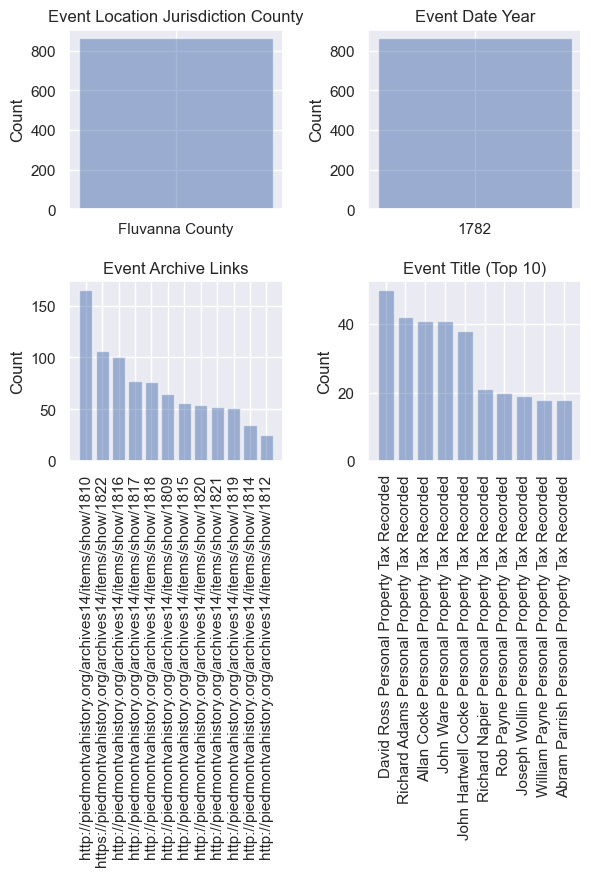

In [35]:
figure, axis = plt.subplots(2, 2)

# plot 1
objects1 = tax1782.EventLocJurisdictionCounty.value_counts().to_frame('n').index
y_pos1 = np.arange(len(objects1))
height1 = tax1782.EventLocJurisdictionCounty.value_counts().to_frame('n')['n']

axis[0, 0].bar(y_pos1, height1, align='center', alpha=0.5)
axis[0, 0].set_xticks(y_pos1, objects1)
axis[0, 0].set_ylabel('Count')
axis[0, 0].set_title('Event Location Jurisdiction County')

# plot 2
objects2 = tax1782.EventDateYear.value_counts().to_frame('n').index
y_pos2 = np.arange(len(objects2))
height2 = tax1782.EventDateYear.value_counts().to_frame('n')['n']

axis[0, 1].bar(y_pos2, height2, align='center', alpha=0.5)
axis[0, 1].set_xticks(y_pos2, objects2)
axis[0, 1].set_ylabel('Count')
axis[0, 1].set_title('Event Date Year')

#plot 3
objects3 = tax1782.EventArchiveLink.value_counts().to_frame('n').index
y_pos3 = np.arange(len(objects3))
height3 = tax1782.EventArchiveLink.value_counts().to_frame('n')['n']

axis[1, 0].bar(y_pos3, height3, align='center', alpha=0.5)
axis[1, 0].set_xticks(y_pos3, objects3, rotation=90)
axis[1, 0].set_ylabel('Count')
axis[1, 0].set_title('Event Archive Links')

# plot 4
objects4 = tax1782.EventTitle.value_counts().to_frame('n').index[:10]
y_pos4 = np.arange(len(objects4))
height4 = tax1782.EventTitle.value_counts().to_frame('n')['n'][:10]

axis[1, 1].bar(y_pos4, height4, align='center', alpha=0.5)
axis[1, 1].set_xticks(y_pos4, objects4, rotation = 90)
axis[1, 1].set_ylabel('Count')
axis[1, 1].set_title('Event Title (Top 10)')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.001,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

#### Person

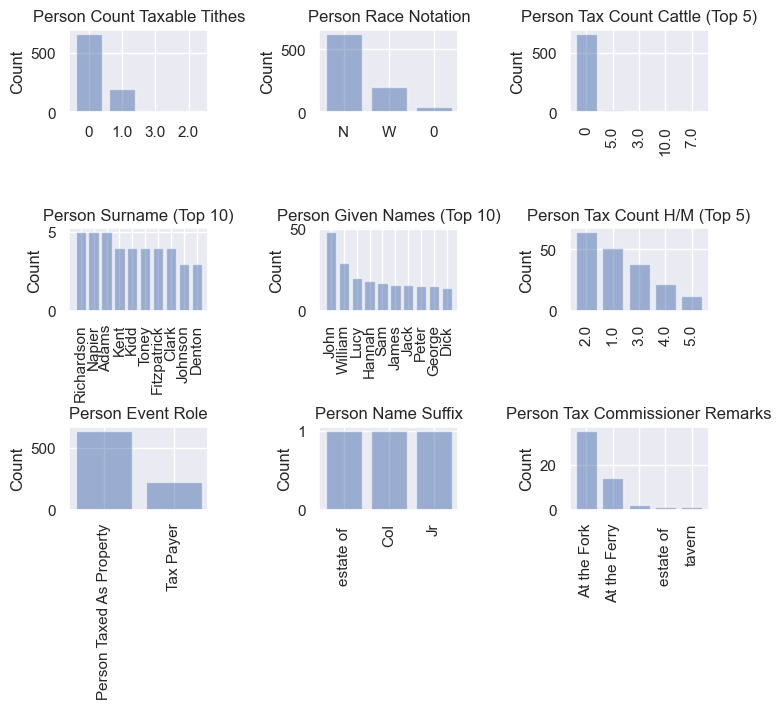

In [36]:
figure, axis = plt.subplots(3, 3)

# plot 1
objects1 = tax1782.PersonCountTaxableTithes.value_counts().to_frame('n').index
y_pos1 = np.arange(len(objects1))
height1 = tax1782.PersonCountTaxableTithes.value_counts().to_frame('n')['n']

axis[0, 0].bar(y_pos1, height1, align='center', alpha=0.5)
axis[0, 0].set_xticks(y_pos1, objects1)
axis[0, 0].set_ylabel('Count')
axis[0, 0].set_title('Person Count Taxable Tithes')

# plot 2
objects2 = tax1782.PersonRaceNotation.value_counts().to_frame('n').index
y_pos2 = np.arange(len(objects2))
height2 = tax1782.PersonRaceNotation.value_counts().to_frame('n')['n']

axis[0, 1].bar(y_pos2, height2, align='center', alpha=0.5)
axis[0, 1].set_xticks(y_pos2, objects2)
axis[0, 1].set_ylabel('Count')
axis[0, 1].set_title('Person Race Notation')

# plot 3
objects3 = tax1782.PersonTaxCountCattle.value_counts().to_frame('n').index[:5]
y_pos3 = np.arange(len(objects3))
height3 = tax1782.PersonTaxCountCattle.value_counts().to_frame('n')['n'][:5]

axis[0, 2].bar(y_pos3, height3, align='center', alpha=0.5)
axis[0, 2].set_xticks(y_pos3, objects3, rotation = 90)
axis[0, 2].set_ylabel('Count')
axis[0, 2].set_title('Person Tax Count Cattle (Top 5)')

#plot 4
objects4 = tax1782.PersonSurname.value_counts().to_frame('n').index[1:11]
y_pos4 = np.arange(len(objects4))
height4 = tax1782.PersonSurname.value_counts().to_frame('n')['n'][1:11]

axis[1, 0].bar(y_pos4, height4, align='center', alpha=0.5)
axis[1, 0].set_xticks(y_pos4, objects4, rotation = 90)
axis[1, 0].set_ylabel('Count')
axis[1, 0].set_title('Person Surname (Top 10)')

# plot 5
objects5 = tax1782.PersonGivenNames.value_counts().to_frame('n').index[:10]
y_pos5 = np.arange(len(objects5))
height5 = tax1782.PersonGivenNames.value_counts().to_frame('n')['n'][:10]

axis[1, 1].bar(y_pos5, height5, align='center', alpha=0.5)
axis[1, 1].set_xticks(y_pos5, objects5, rotation = 90)
axis[1, 1].set_ylabel('Count')
axis[1, 1].set_title('Person Given Names (Top 10)')

# plot 6
objects6 = tax1782.PersonTaxCountHorsesMules.value_counts().to_frame('n').index[1:6]
y_pos6 = np.arange(len(objects6))
height6 = tax1782.PersonTaxCountHorsesMules.value_counts().to_frame('n')['n'][1:6]

axis[1, 2].bar(y_pos6, height6, align='center', alpha=0.5)
axis[1, 2].set_xticks(y_pos6, objects6, rotation = 90)
axis[1, 2].set_ylabel('Count')
axis[1, 2].set_title('Person Tax Count H/M (Top 5)')

#plot 7
objects7 = tax1782.PersonEventRole.value_counts().to_frame('n').index
y_pos7 = np.arange(len(objects7))
height7 = tax1782.PersonEventRole.value_counts().to_frame('n')['n']

axis[2, 0].bar(y_pos7, height7, align='center', alpha=0.5)
axis[2, 0].set_xticks(y_pos7, objects7, rotation = 90)
axis[2, 0].set_ylabel('Count')
axis[2, 0].set_title('Person Event Role')

#plot 8
objects8 = tax1782.PersonNameSuffix.value_counts().to_frame('n').index[1:]
y_pos8 = np.arange(len(objects8))
height8 = tax1782.PersonNameSuffix.value_counts().to_frame('n')['n'][1:]

axis[2, 1].bar(y_pos8, height8, align='center', alpha=0.5)
axis[2, 1].set_xticks(y_pos8, objects8, rotation = 90)
axis[2, 1].set_ylabel('Count')
axis[2, 1].set_title('Person Name Suffix')

#plot 9
objects9 = tax1782.PersonTaxCommissionerRemarks.value_counts().to_frame('n').index[1:]
y_pos9 = np.arange(len(objects9))
height9 = tax1782.PersonTaxCommissionerRemarks.value_counts().to_frame('n')['n'][1:]

axis[2, 2].bar(y_pos9, height9, align='center', alpha=0.5)
axis[2, 2].set_xticks(y_pos9, objects9, rotation = 90)
axis[2, 2].set_ylabel('Count')
axis[2, 2].set_title('Person Tax Commissioner Remarks')

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.0001,
                    right=1.0,
                    top=1.0,
                    wspace=0.8,
                    hspace=1.4)

plt.show()

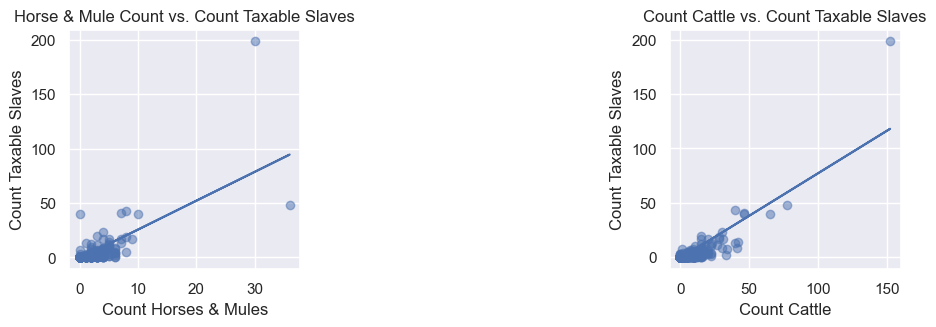

In [37]:
figure, axis = plt.subplots(1, 2)

# plot 1
x1 = np.float64(tax1782.PersonTaxCountHorsesMules)
y1 = np.float64(tax1782.PersonCountTaxableEnslavedPersons)

m1, b1 = np.polyfit(x1, y1, 1)

axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Count Horses & Mules')
axis[0].set_ylabel('Count Taxable Slaves')
axis[0].set_title('Horse & Mule Count vs. Count Taxable Slaves')
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(tax1782.PersonTaxCountCattle)
y2 = np.float64(tax1782.PersonCountTaxableEnslavedPersons)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Count Cattle')
axis[1].set_ylabel('Count Taxable Slaves')
axis[1].set_title('Count Cattle vs. Count Taxable Slaves')
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

This seems to show a correlation between ownership of large numbers of cattle and horses/mules and slaves. This is unsurprising given that both are probably markers of wealth.

#### Source

All source features have only one feature except for `SourceAuthorName`

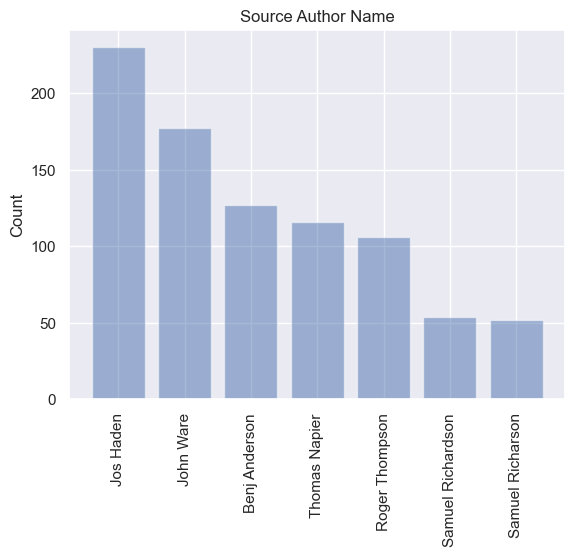

In [38]:
objects = tax1782.SourceAuthorName.value_counts().to_frame('n').index
y_pos = np.arange(len(objects))
height = tax1782.SourceAuthorName.value_counts().to_frame('n')['n']

plt.bar(y_pos, height, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation = 90)
plt.ylabel('Count')
plt.title('Source Author Name')

plt.show()

### Correlation

In [39]:
# select numeric columns except year (all year values are the same)
tax1782_numeric = tax1782[['PersonCountTaxableEnslavedPersons', 'PersonCountTaxableTithes', 'PersonTaxCountCattle', 'PersonTaxCountHorsesMules']]

# convert columns to np.float types
tax1782_numeric = tax1782_numeric.astype(np.float64)

# show dataframe
tax1782_numeric.head()

,PersonCountTaxableEnslavedPersons,PersonCountTaxableTithes,PersonTaxCountCattle,PersonTaxCountHorsesMules
0,0.0,1.0,2.0,1.0
1,9.0,1.0,41.0,5.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0


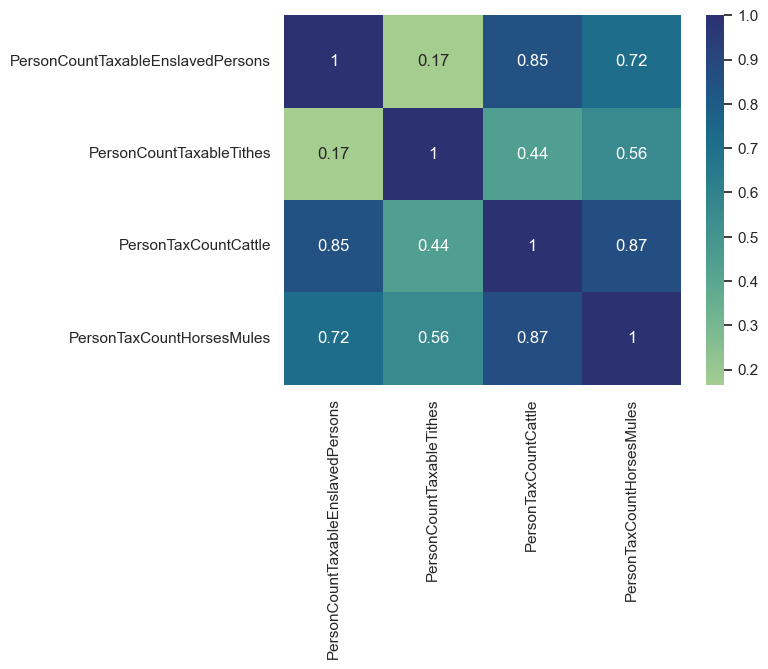

In [40]:
corr = tax1782_numeric.corr(method='pearson')
sns.heatmap(corr, 
        cmap="crest",
        annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns);

As expected, we see moderately strong positive correlations between `PersonCountTaxableEnslavedPersons`, `PersonTaxCountCattle`, and `PersonTaxCountHorsesMules`. We see weaker to moderate positive correlations bewteen `PersonCountTaxableTithes` and the other features specified here. This indicates positive correlation between all of these variables, which makes sense since these all seem to be indicators of wealth. It's surprising that `PersonCountTaxableTithes` is less significant in relation to these other variables. More thinking should be done on why this is, incorporating specifically what this value means.

# 1867

### Basic Information

In [41]:
tax1867.head()

,EventDateYear,EventImageLink,EventLocJurisdictionCounty,EventTitle,PersonEventRole,PersonGivenNames,PersonNameAlternate,PersonNameSuffix,PersonRoleGivenNamesEmployer,PersonRoleLocResidence,...,SourceAuthorName,SourceCreator,SourceDateYearCreated,SourceLocCity,SourceLocCreatedCounty,SourceLocState,SourceSteward,SourceTitle,SourceType,_id
0,1867,https://onesharedstory.org/HBCP/files/original...,Cumberland,Personal Property Tax Recorded,taxpayer,Joseph L,NaN,NaN,NaN,NaN,...,R B Trent,Cumberland County,1867,Richmond,Cumberland,Virginia,Library of Virginia,County Personal Property Taxes,Government Record,63e9361e59c84387372abcaf
1,1867,https://onesharedstory.org/HBCP/files/original...,Cumberland,Personal Property Tax Recorded,taxpayer,Baldwin T,NaN,NaN,NaN,NaN,...,R B Trent,Cumberland County,1867,Richmond,Cumberland,Virginia,Library of Virginia,County Personal Property Taxes,Government Record,63e9361e59c84387372abcb0
2,1867,https://onesharedstory.org/HBCP/files/original...,Cumberland,Personal Property Tax Recorded,taxpayer,Daniel N,NaN,NaN,NaN,NaN,...,R B Trent,Cumberland County,1867,Richmond,Cumberland,Virginia,Library of Virginia,County Personal Property Taxes,Government Record,63e9361e59c84387372abcb1
3,1867,https://onesharedstory.org/HBCP/files/original...,Cumberland,Personal Property Tax Recorded,taxpayer,Thomas,NaN,Est,NaN,NaN,...,R B Trent,Cumberland County,1867,Richmond,Cumberland,Virginia,Library of Virginia,County Personal Property Taxes,Government Record,63e9361e59c84387372abcb2
4,1867,https://onesharedstory.org/HBCP/files/original...,Cumberland,Personal Property Tax Recorded,taxpayer,Benj J,Benjamin J,NaN,NaN,NaN,...,R B Trent,Cumberland County,1867,Richmond,Cumberland,Virginia,Library of Virginia,County Personal Property Taxes,Government Record,63e9361e59c84387372abcb3


In [42]:
tax1867.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12363 entries, 0 to 12362
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   EventDateYear                           12363 non-null  int64  
 1   EventImageLink                          12363 non-null  object 
 2   EventLocJurisdictionCounty              12363 non-null  object 
 3   EventTitle                              12363 non-null  object 
 4   PersonEventRole                         12363 non-null  object 
 5   PersonGivenNames                        12327 non-null  object 
 6   PersonNameAlternate                     1097 non-null   object 
 7   PersonNameSuffix                        2648 non-null   object 
 8   PersonRoleGivenNamesEmployer            6606 non-null   object 
 9   PersonRoleLocResidence                  2485 non-null   object 
 10  PersonRoleLocSurnameEmployer            6844 non-null   ob

In [43]:
tax1867.describe()

,EventDateYear,PersonTaxCountCarriageWagon,PersonTaxCountCattle,PersonTaxCountClocks,PersonTaxCountHogs,PersonTaxCountHorsesMules,PersonTaxCountMusicalInstruments,PersonTaxCountNMalesover16,PersonTaxCountSheep,PersonTaxCountWMalesover16,...,PersonTaxValueHogs,PersonTaxValueHorsesMules,PersonTaxValueJewelry,PersonTaxValueMoniesSchC1,PersonTaxValueMusicalInstruments,PersonTaxValueSheep,PersonTaxValueWatches,PersonsTaxedCountNMalesover21,PersonsTaxedCountWMalesover21,SourceDateYearCreated
count,12363.000000,1323.000000,4118.000000,1165.000000,3554.000000,3630.000000,242.000000,2108.000000,1367.000000,1622.000000,...,3569.000000,3635.000000,530.000000,3.000000,444.000000,1367.000000,1169.00000,6216.000000,5084.000000,12363.0
mean,1867.001213,1.398337,5.720495,1.032618,10.115082,2.700275,1.061983,1.044118,14.574250,1.160296,...,30.465396,177.681706,41.552830,3666.666667,112.855856,34.366496,41.54491,1.005309,1.022620,1867.0
std,0.041198,2.372797,7.289617,0.340255,10.298417,2.917337,0.455807,0.340926,19.983855,0.462220,...,36.037171,213.036286,79.162643,1154.700538,83.358493,71.757009,38.76364,0.134735,0.172013,0.0
min,1867.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,3000.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1867.0
25%,1867.000000,1.000000,2.000000,1.000000,4.000000,1.000000,1.000000,1.000000,6.000000,1.000000,...,10.000000,60.000000,15.000000,3000.000000,50.000000,15.000000,15.00000,1.000000,1.000000,1867.0
50%,1867.000000,1.000000,4.000000,1.000000,7.000000,2.000000,1.000000,1.000000,10.000000,1.000000,...,20.000000,100.000000,25.000000,3000.000000,100.000000,21.000000,25.00000,1.000000,1.000000,1867.0
75%,1867.000000,1.000000,7.000000,1.000000,13.000000,3.000000,1.000000,1.000000,17.000000,1.000000,...,40.000000,200.000000,40.000000,4000.000000,150.000000,38.500000,60.00000,1.000000,1.000000,1867.0
max,1869.000000,45.000000,150.000000,10.000000,125.000000,50.000000,5.000000,10.000000,400.000000,5.000000,...,720.000000,3900.000000,800.000000,5000.000000,1200.000000,2000.000000,300.00000,8.000000,4.000000,1867.0


### Duplicate Values

In [44]:
tax1867.duplicated().sum()

0

### Find and Replace Null Values

Find out how many observations have missing values.

In [45]:
missing = tax1867.shape[0] - tax1867.dropna().shape[0]
size = tax1867.shape[0]
print("Of " + str(size) + " observations, " + str(missing) + " have missing values.")

Of 12363 observations, 12363 have missing values.


Replace missing values with 0s.

In [46]:
tax1867.isnull().sum()

EventDateYear                                 0
EventImageLink                                0
EventLocJurisdictionCounty                    0
EventTitle                                    0
PersonEventRole                               0
PersonGivenNames                             36
PersonNameAlternate                       11266
PersonNameSuffix                           9715
PersonRoleGivenNamesEmployer               5757
PersonRoleLocResidence                     9878
PersonRoleLocSurnameEmployer               5519
PersonSurname                                 2
PersonTaxCommissionerRemarks              10211
PersonTaxCountCarriageWagon               11040
PersonTaxCountCattle                       8245
PersonTaxCountClocks                      11198
PersonTaxCountHogs                         8809
PersonTaxCountHorsesMules                  8733
PersonTaxCountMusicalInstruments          12121
PersonTaxCountNMalesover16                10255
PersonTaxCountSheep                     

In [47]:
tax1867.replace(np.nan,'0',inplace = True)

### Unique Values

#### Event

**Event Date Year**

In [48]:
tax1867['EventDateYear'].value_counts()

1867    12351
1868        9
1869        3
Name: EventDateYear, dtype: int64

**Event Image Link**

In [49]:
tax1867['EventImageLink'].value_counts()

https://onesharedstory.org/HBCP/files/original/e52d01aed052d63573b7f98c661981d0.pdf    2065
https://onesharedstory.org/HBCP/files/original/6baca72d28575bbb7fb63cf6906baaac.pdf     746
https://onesharedstory.org/HBCP/files/original/2d03cc154f3e9b34c367c7d2ee2cfd49.pdf     650
https://onesharedstory.org/HBCP/files/original/798349af0263869fc7dd94e35daccb2d.pdf     647
https://onesharedstory.org/HBCP/files/original/e9b003282b83eabf0582b6b711df6bf0.pdf     445
                                                                                       ... 
https://onesharedstory.org/HBCP/files/original/4857be20c60f458fd41abd22c7e4965d.jpg      33
https://onesharedstory.org/HBCP/files/original/48ed03f27d6677cf325fa00320715d43.jpg      33
https://onesharedstory.org/HBCP/files/original/e28b260bf207a06e2e70c90425449317.jpg      26
https://onesharedstory.org/HBCP/files/original/9166a1cb60eedc7ded2ddaeb25f78423.jpg      21
https://onesharedstory.org/HBCP/files/original/3eae13782fbe7f11e80978720dea4222.

**Event Loc Jurisdiction County**

In [50]:
tax1867['EventLocJurisdictionCounty'].value_counts()

Buckingham    3216
Louisa        3017
Orange        2210
Fluvanna      2065
Cumberland    1795
Louisa          60
Name: EventLocJurisdictionCounty, dtype: int64

**Event Title**

In [51]:
tax1867['EventTitle'].value_counts()

Personal Property Tax Recorded    12363
Name: EventTitle, dtype: int64

#### Person

**Person Event Role**

In [52]:
tax1867['PersonEventRole'].value_counts()

resident and taxpayer    6404
taxpayer                 5959
Name: PersonEventRole, dtype: int64

**Person Given Names**

In [53]:
tax1867['PersonGivenNames'].value_counts()

John           301
Henry          234
William        227
James          157
Robert         153
              ... 
Grandison        1
Berchia          1
Edward B         1
Walter S         1
Smith Lewis      1
Name: PersonGivenNames, Length: 3472, dtype: int64

**Person Name Alternate**

In [54]:
tax1867['PersonNameAlternate'].value_counts()

0              11266
William          124
George            69
John              39
James             33
               ...  
Robert D           1
Robert A           1
Robert B           1
Elizabeth A        1
Maurice            1
Name: PersonNameAlternate, Length: 298, dtype: int64

**Person Name Suffix**

In [55]:
tax1867['PersonNameSuffix'].value_counts()

0           9715
            1984
Mrs          104
Est           93
Jr            67
            ... 
D5             1
S A M          1
Jr.            1
General        1
Children       1
Name: PersonNameSuffix, Length: 92, dtype: int64

**Person Role Given Names Employer**

In [56]:
tax1867['PersonRoleGivenNamesEmployer'].value_counts()

0              5757
               1357
William         102
R                99
J M              80
               ... 
Mo T              1
Rand              1
Henry and G       1
Isbell            1
John W            1
Name: PersonRoleGivenNamesEmployer, Length: 1185, dtype: int64

**Person Role Loc Residence**

In [57]:
tax1867['PersonRoleLocResidence'].value_counts()

0                    9878
                     1976
Orange Courthouse      37
Gordonsville           30
Cartersville           30
                     ... 
Cary Brook              1
Cocke Road 8 ms         1
Cocke Road              1
Near Snead Mill         1
Stoven                  1
Name: PersonRoleLocResidence, Length: 153, dtype: int64

**Person Role Loc Surname Employer**

In [58]:
tax1867['PersonRoleLocSurnameEmployer'].value_counts()

0            5519
             1301
Johnson        97
Harris         94
Jones          84
             ... 
Malory          1
Siegfried       1
Hacketts        1
Cattells        1
McIntosh        1
Name: PersonRoleLocSurnameEmployer, Length: 1069, dtype: int64

**Person Surname**

In [59]:
tax1867['PersonSurname'].value_counts()

Johnson       305
Jones         244
Jackson       212
Brown         200
Smith         193
             ... 
Osbourn         1
Brightwill      1
Numanley        1
Neeley          1
Chenaulth       1
Name: PersonSurname, Length: 2140, dtype: int64

**Explore:** how many people have the same surname as their employer? we no longer see race notation here...

In [60]:
tax1867.loc[(tax1867['PersonSurname'] == tax1867['PersonRoleLocSurnameEmployer'])][['PersonEventRole',
                                                                                   'PersonGivenNames',
                                                                                   'PersonSurname',
                                                                                   'PersonRoleGivenNamesEmployer',
                                                                                   'PersonRoleLocSurnameEmployer',
                                                                                   'PersonsTaxedCountNMalesover21',
                                                                                   'PersonsTaxedCountWMalesover21',
                                                                                   'PersonTaxCountNMalesover16',
                                                                                   'PersonTaxCountWMalesover16']]

,PersonEventRole,PersonGivenNames,PersonSurname,PersonRoleGivenNamesEmployer,PersonRoleLocSurnameEmployer,PersonsTaxedCountNMalesover21,PersonsTaxedCountWMalesover21,PersonTaxCountNMalesover16,PersonTaxCountWMalesover16
68,resident and taxpayer,Robert,Anderson,E G,Anderson,1.0,0,1.0,0
165,resident and taxpayer,John,Booker,A F,Booker,1.0,0,1.0,0
227,resident and taxpayer,Nelson,Booker,F H,Booker,1.0,0,1.0,0
228,resident and taxpayer,Isham,Booker,F H,Booker,1.0,0,1.0,0
434,resident and taxpayer,Len,Carrington,R C,Carrington,1.0,0,1.0,0
...,...,...,...,...,...,...,...,...,...
11366,resident and taxpayer,Jacob,Lee,Maj,Lee,1.0,0,0,0
11367,resident and taxpayer,Stewart,Lee,Maj,Lee,1.0,0,0,0
11581,resident and taxpayer,Reuben,Newman,J B,Newman,1.0,0,0,0
11585,resident and taxpayer,Edmund,Newman,R,Newman,1.0,0,0,0


We see 143 individuals with the same last name as their employer - probably former slaves.

**Person Tax Commissioner Remarks**

In [61]:
tax1867['PersonTaxCommissionerRemarks'].value_counts()

0                                                    10211
                                                      2063
W                                                       28
VA Central Railroad Stock                                8
State Stock                                              8
at P B Jones                                             1
Orange & Alexandria Railroad                             1
overcharged 0.01                                         1
At Springs                                               1
Gordonsville                                             1
Near C G Payne                                           1
at M E Daniels                                           1
at Charles Scott                                         1
at Mrs White                                             1
R B Webb                                                 1
VA Central Railroad Bonds                                1
Grove                                                   

**Person Tax Count Carriage Wagon**

In [62]:
tax1867['PersonTaxCountCarriageWagon'].value_counts()

0       11040
1.0      1150
2.0       135
3.0        11
15.0        6
5.0         4
10.0        3
25.0        3
20.0        2
8.0         2
4.0         2
11.0        1
9.0         1
23.0        1
30.0        1
45.0        1
Name: PersonTaxCountCarriageWagon, dtype: int64

**Person Tax Count Cattle**

In [63]:
tax1867['PersonTaxCountCattle'].value_counts()

0        8245
1.0       811
2.0       762
3.0       464
4.0       352
5.0       297
6.0       255
7.0       216
8.0       159
10.0      134
9.0       118
12.0       87
11.0       85
15.0       59
14.0       48
13.0       45
20.0       29
17.0       25
16.0       23
18.0       19
25.0       15
22.0       14
24.0       13
19.0       10
30.0        9
26.0        7
35.0        6
23.0        5
28.0        4
40.0        4
32.0        4
33.0        3
21.0        3
38.0        3
37.0        2
27.0        2
60.0        2
80.0        2
46.0        2
70.0        2
52.0        1
59.0        1
100.0       1
34.0        1
55.0        1
87.0        1
61.0        1
36.0        1
41.0        1
44.0        1
45.0        1
57.0        1
29.0        1
31.0        1
105.0       1
50.0        1
150.0       1
71.0        1
Name: PersonTaxCountCattle, dtype: int64

**Person Tax Count Clocks**

In [64]:
tax1867['PersonTaxCountClocks'].value_counts()

0       11198
1.0      1142
2.0        19
5.0         2
10.0        1
3.0         1
Name: PersonTaxCountClocks, dtype: int64

**Person Tax Count Hogs**

In [65]:
tax1867['PersonTaxCountHogs'].value_counts()

0        8809
2.0       318
5.0       276
1.0       270
4.0       261
         ... 
125.0       1
41.0        1
64.0        1
62.0        1
51.0        1
Name: PersonTaxCountHogs, Length: 71, dtype: int64

**Person Tax Count Horses Mules**

In [66]:
tax1867['PersonTaxCountHorsesMules'].value_counts()

0       8733
1.0     1504
2.0      895
3.0      429
4.0      289
5.0      163
6.0      110
7.0       71
8.0       44
9.0       34
10.0      16
11.0      11
12.0       8
13.0       8
18.0       6
14.0       6
17.0       6
20.0       5
15.0       5
16.0       4
19.0       4
22.0       3
21.0       2
30.0       2
40.0       1
35.0       1
24.0       1
50.0       1
28.0       1
Name: PersonTaxCountHorsesMules, dtype: int64

**Person Tax Count Musical Instruments**

In [67]:
tax1867['PersonTaxCountMusicalInstruments'].value_counts()

0      12121
1.0      236
2.0        3
5.0        3
Name: PersonTaxCountMusicalInstruments, dtype: int64

**Person Tax Count N Males over 16**

In [68]:
tax1867['PersonTaxCountNMalesover16'].value_counts()

0       10255
1.0      2049
2.0        43
3.0         8
4.0         4
5.0         2
6.0         1
10.0        1
Name: PersonTaxCountNMalesover16, dtype: int64

At this point, were these individuals considered slaves or not?

**Person Tax Count Sheep**

In [69]:
tax1867['PersonTaxCountSheep'].value_counts()

0        10996
8.0         97
4.0         96
6.0         96
5.0         89
         ...  
113.0        1
53.0         1
135.0        1
56.0         1
214.0        1
Name: PersonTaxCountSheep, Length: 70, dtype: int64

**Person Tax Count W Males over 16**

In [70]:
tax1867['PersonTaxCountWMalesover16'].value_counts()

0      10741
1.0     1405
2.0      170
3.0       36
4.0        6
0.0        4
5.0        1
Name: PersonTaxCountWMalesover16, dtype: int64

**Person Tax Count Watches**

In [71]:
tax1867['PersonTaxCountWatches'].value_counts()

0       11632
1.0       642
2.0        74
3.0         7
15.0        2
10.0        2
25.0        1
4.0         1
5.0         1
50.0        1
Name: PersonTaxCountWatches, dtype: int64

**Person Tax Levied Land**

In [72]:
tax1867['PersonTaxLeviedLand'].value_counts()

0        10537
15.0      1085
17.0        30
16.0        23
1.2         22
         ...  
70.0         1
103.0        1
151.0        1
193.0        1
0.23         1
Name: PersonTaxLeviedLand, Length: 194, dtype: int64

**Person Tax State All**

In [73]:
tax1867['PersonTaxStateAll'].value_counts()

0.6      6818
0         321
0.75      162
0.9       116
0.68      115
         ... 
7.59        1
6.6         1
3.13        1
8.1         1
10.36       1
Name: PersonTaxStateAll, Length: 584, dtype: int64

**Person Tax Total County Value**

In [74]:
tax1867['PersonTaxTotalCountyValue'].value_counts()

0       8694
1.2     1077
1.15    1050
1.0       55
1.28      42
        ... 
2.78       1
2.54       1
1.12       1
2.75       1
3.28       1
Name: PersonTaxTotalCountyValue, Length: 328, dtype: int64

**Person Tax Value Aggregate Personl Property**

In [75]:
tax1867['PersonTaxValueAggregatePersonlProperty'].value_counts()

0         7372
50.0       171
100.0      129
25.0       121
75.0       109
          ... 
970.0        1
2085.0       1
1960.0       1
2105.0       1
141.0        1
Name: PersonTaxValueAggregatePersonlProperty, Length: 795, dtype: int64

**Person Tax Value Carriage Wagon**

In [76]:
tax1867['PersonTaxValueCarriageWagon'].value_counts()

0        11052
50.0       219
25.0       181
30.0       125
20.0       122
100.0      111
40.0       110
75.0        78
10.0        60
15.0        59
150.0       46
200.0       26
60.0        21
35.0        20
250.0       14
45.0        13
125.0       13
5.0         12
80.0        12
70.0        10
1.0          9
120.0        8
175.0        7
400.0        5
130.0        4
300.0        4
12.0         4
140.0        2
55.0         2
160.0        2
350.0        2
220.0        2
225.0        1
450.0        1
195.0        1
65.0         1
375.0        1
23.0         1
340.0        1
90.0         1
Name: PersonTaxValueCarriageWagon, dtype: int64

**Person Tax Value Cattle**

In [77]:
tax1867['PersonTaxValueCattle'].value_counts()

0         8248
25.0       343
50.0       326
20.0       324
30.0       311
          ... 
1340.0       1
1115.0       1
27.0         1
13.0         1
82.0         1
Name: PersonTaxValueCattle, Length: 209, dtype: int64

**Person Tax Value Clocks**

In [78]:
tax1867['PersonTaxValueClocks'].value_counts()

0        10650
5.0       1286
2.0        151
3.0        103
10.0        69
1.0         56
4.0          9
15.0         9
20.0         7
50.0         6
30.0         4
8.0          3
7.0          3
6.0          2
12.0         2
150.0        1
80.0         1
40.0         1
Name: PersonTaxValueClocks, dtype: int64

**Person Tax Value Furnishings**

In [79]:
tax1867['PersonTaxValueFurnishings'].value_counts()

0         8159
50.0       704
100.0      552
25.0       428
150.0      358
          ... 
195.0        1
180.0        1
115.0        1
255.0        1
1200.0       1
Name: PersonTaxValueFurnishings, Length: 67, dtype: int64

**Person Tax Value Hogs**

In [80]:
tax1867['PersonTaxValueHogs'].value_counts()

0        8794
10.0      451
20.0      374
15.0      373
5.0       343
         ... 
104.0       1
98.0        1
112.0       1
96.0        1
86.0        1
Name: PersonTaxValueHogs, Length: 125, dtype: int64

**Person Tax Value Horses Mules**

In [81]:
tax1867['PersonTaxValueHorsesMules'].value_counts()

0         8728
100.0      455
150.0      380
50.0       363
75.0       285
          ... 
2790.0       1
1350.0       1
530.0        1
43.0         1
495.0        1
Name: PersonTaxValueHorsesMules, Length: 152, dtype: int64

**Person Tax Value Jewelry**

In [82]:
tax1867['PersonTaxValueJewelry'].value_counts()

0        11833
15.0        71
20.0        66
25.0        53
10.0        50
50.0        50
5.0         45
30.0        42
40.0        27
35.0        17
100.0       14
75.0        11
60.0         9
6.0          9
18.0         9
45.0         6
250.0        5
12.0         5
200.0        4
150.0        3
33.0         2
125.0        2
115.0        2
600.0        2
800.0        2
55.0         2
14.0         1
80.0         1
110.0        1
85.0         1
90.0         1
3.0          1
24.0         1
70.0         1
1.0          1
8.0          1
450.0        1
165.0        1
650.0        1
300.0        1
120.0        1
2.0          1
16.0         1
36.0         1
28.0         1
500.0        1
4.0          1
130.0        1
Name: PersonTaxValueJewelry, dtype: int64

**Person Tax Value Monies Sch C1**

In [83]:
tax1867['PersonTaxValueMoniesSchC1'].value_counts()

0         12360
3000.0        2
5000.0        1
Name: PersonTaxValueMoniesSchC1, dtype: int64

**Person Tax Value Musical Instruments**

In [84]:
tax1867['PersonTaxValueMusicalInstruments'].value_counts()

0         11919
100.0       101
150.0        92
50.0         59
200.0        53
75.0         31
25.0         23
30.0         11
20.0         10
250.0        10
125.0         8
40.0          6
300.0         6
5.0           5
45.0          4
10.0          3
60.0          3
1.0           3
35.0          2
400.0         1
95.0          1
90.0          1
175.0         1
160.0         1
1200.0        1
15.0          1
155.0         1
220.0         1
70.0          1
180.0         1
80.0          1
120.0         1
240.0         1
Name: PersonTaxValueMusicalInstruments, dtype: int64

**Person Tax Value Sheep**

In [85]:
tax1867['PersonTaxValueSheep'].value_counts()

0        10996
15.0       188
20.0       159
10.0       156
25.0       130
         ...  
175.0        1
762.0        1
285.0        1
81.0         1
86.0         1
Name: PersonTaxValueSheep, Length: 103, dtype: int64

**Person Tax Value Watches**

In [86]:
tax1867['PersonTaxValueWatches'].value_counts()

0        11194
10.0       178
50.0       135
15.0       135
20.0        98
75.0        97
100.0       97
25.0        90
30.0        76
5.0         73
40.0        31
60.0        29
150.0       20
1.0         12
80.0        12
125.0       10
35.0         9
200.0        9
8.0          8
70.0         8
3.0          5
130.0        4
120.0        4
45.0         3
2.0          2
55.0         2
4.0          2
7.0          2
18.0         2
175.0        2
85.0         2
165.0        1
185.0        1
140.0        1
110.0        1
180.0        1
95.0         1
16.0         1
0.0          1
300.0        1
105.0        1
90.0         1
12.0         1
Name: PersonTaxValueWatches, dtype: int64

**Persons Taxed Count N Males over 21**

In [87]:
tax1867['PersonsTaxedCountNMalesover21'].value_counts()

1.0    6200
0      6147
2.0      10
5.0       2
4.0       2
8.0       1
3.0       1
Name: PersonsTaxedCountNMalesover21, dtype: int64

**Persons Taxed Count W Males over 21**

In [88]:
tax1867['PersonsTaxedCountWMalesover21'].value_counts()

0      7279
1.0    4986
2.0      83
3.0      13
4.0       2
Name: PersonsTaxedCountWMalesover21, dtype: int64

**Area for exploration:** if possible, find out the race of the people who own the majority of the property that's taxed (like carriages)

#### Source

**Source Author Name**

In [89]:
tax1867['SourceAuthorName'].value_counts()

G W Wright         2109
O B Thomas         2065
R B Trent          1795
2 Wm K Saunders    1788
John A Perkins     1629
Robert F Moss      1448
1 J E Morgan       1428
GW Wright           101
Name: SourceAuthorName, dtype: int64

**Source Creator**

In [90]:
tax1867['SourceCreator'].value_counts()

Buckingham County           3216
Orange County               2210
Fluvanna County             2065
Cumberland County           1795
Louisa County District 1    1629
Louisa County District 2    1448
Name: SourceCreator, dtype: int64

**Source Date Year Created**

In [91]:
tax1867['SourceDateYearCreated'].value_counts()

1867    12363
Name: SourceDateYearCreated, dtype: int64

**Source Loc City**

In [92]:
tax1867['SourceLocCity'].value_counts()

Richmond    12363
Name: SourceLocCity, dtype: int64

**Source Loc Created County**

In [93]:
tax1867['SourceLocCreatedCounty'].value_counts()

Buckingham    3216
Louisa        3077
Orange        2210
Fluvanna      2065
Cumberland    1795
Name: SourceLocCreatedCounty, dtype: int64

**Source Loc State**

In [94]:
tax1867['SourceLocState'].value_counts()

Virginia    12363
Name: SourceLocState, dtype: int64

**Source Steward**

In [95]:
tax1867['SourceSteward'].value_counts()

Library of Virginia    12363
Name: SourceSteward, dtype: int64

**Source Title**

In [96]:
tax1867['SourceTitle'].value_counts()

County Personal Property Taxes    12363
Name: SourceTitle, dtype: int64

**Source Type**

In [97]:
tax1867['SourceType'].value_counts()

Government Record    12363
Name: SourceType, dtype: int64

**_id**

In [98]:
tax1867['_id'].value_counts()

63e9361e59c84387372abcaf    1
63e9362459c84387372adcc1    1
63e9362459c84387372adcdb    1
63e9362459c84387372adcdc    1
63e9362459c84387372adcdd    1
                           ..
63e9362059c84387372accca    1
63e9362059c84387372acccb    1
63e9362059c84387372acccc    1
63e9362059c84387372acccd    1
63e9362759c84387372aecf9    1
Name: _id, Length: 12363, dtype: int64

### Visualizations

#### Event

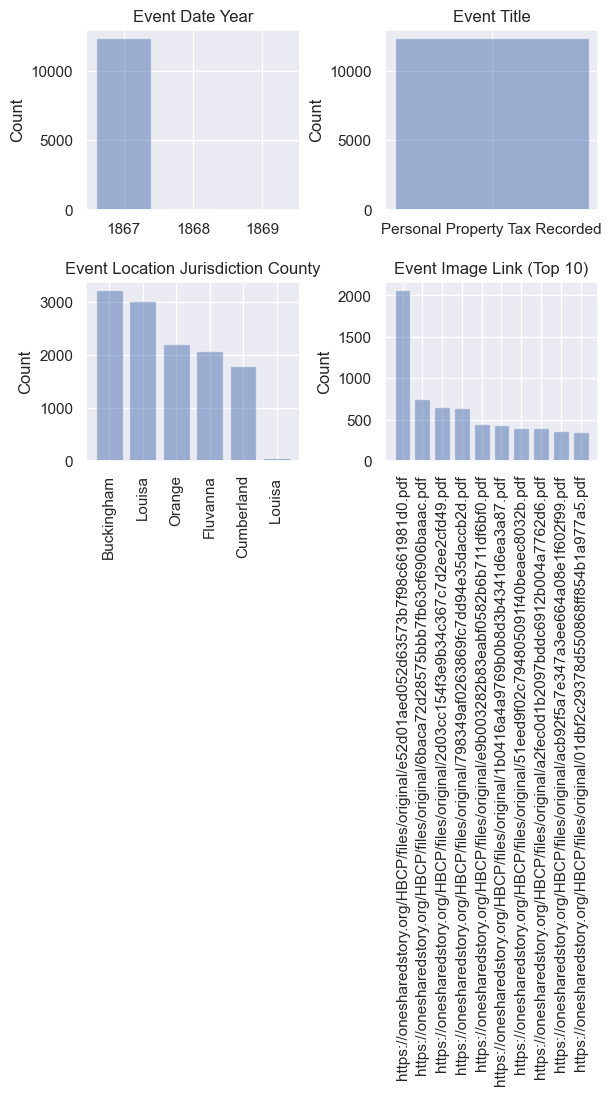

In [99]:
figure, axis = plt.subplots(2, 2)

# plot 1
objects1 = tax1867.EventDateYear.value_counts().to_frame('n').index
y_pos1 = np.arange(len(objects1))
height1 = tax1867.EventDateYear.value_counts().to_frame('n')['n']

axis[0, 0].bar(y_pos1, height1, align='center', alpha=0.5)
axis[0, 0].set_xticks(y_pos1, objects1)
axis[0, 0].set_ylabel('Count')
axis[0, 0].set_title('Event Date Year')

# plot 2
objects2 = tax1867.EventTitle.value_counts().to_frame('n').index
y_pos2 = np.arange(len(objects2))
height2 = tax1867.EventTitle.value_counts().to_frame('n')['n']

axis[0, 1].bar(y_pos2, height2, align='center', alpha=0.5)
axis[0, 1].set_xticks(y_pos2, objects2)
axis[0, 1].set_ylabel('Count')
axis[0, 1].set_title('Event Title')

#plot 3
objects3 = tax1867.EventLocJurisdictionCounty.value_counts().to_frame('n').index
y_pos3 = np.arange(len(objects3))
height3 = tax1867.EventLocJurisdictionCounty.value_counts().to_frame('n')['n']

axis[1, 0].bar(y_pos3, height3, align='center', alpha=0.5)
axis[1, 0].set_xticks(y_pos3, objects3, rotation=90)
axis[1, 0].set_ylabel('Count')
axis[1, 0].set_title('Event Location Jurisdiction County')

# plot 4
objects4 = tax1867.EventImageLink.value_counts().to_frame('n').index[:10]
y_pos4 = np.arange(len(objects4))
height4 = tax1867.EventImageLink.value_counts().to_frame('n')['n'][:10]

axis[1, 1].bar(y_pos4, height4, align='center', alpha=0.5)
axis[1, 1].set_xticks(y_pos4, objects4, rotation = 90)
axis[1, 1].set_ylabel('Count')
axis[1, 1].set_title('Event Image Link (Top 10)')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.001,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.show()

#### Person

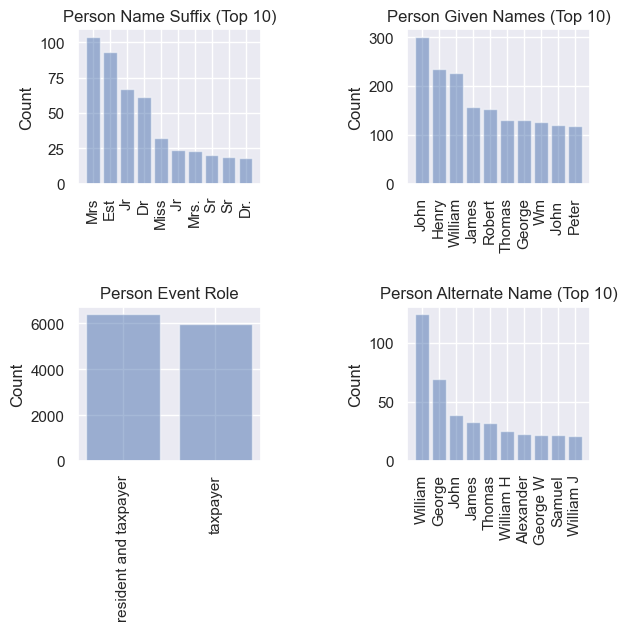

In [100]:
figure, axis = plt.subplots(2, 2)

# plot 1
objects1 = tax1867.PersonNameSuffix.value_counts().to_frame('n').index[2:12]
y_pos1 = np.arange(len(objects1))
height1 = tax1867.PersonNameSuffix.value_counts().to_frame('n')['n'][2:12]

axis[0, 0].bar(y_pos1, height1, align='center', alpha=0.5)
axis[0, 0].set_xticks(y_pos1, objects1, rotation=90)
axis[0, 0].set_ylabel('Count')
axis[0, 0].set_title('Person Name Suffix (Top 10)')

# plot 2
objects2 = tax1867.PersonGivenNames.value_counts().to_frame('n').index[:10]
y_pos2 = np.arange(len(objects2))
height2 = tax1867.PersonGivenNames.value_counts().to_frame('n')['n'][:10]

axis[0, 1].bar(y_pos2, height2, align='center', alpha=0.5)
axis[0, 1].set_xticks(y_pos2, objects2, rotation = 90)
axis[0, 1].set_ylabel('Count')
axis[0, 1].set_title('Person Given Names (Top 10)')

#plot 3
objects3 = tax1867.PersonEventRole.value_counts().to_frame('n').index
y_pos3 = np.arange(len(objects3))
height3 = tax1867.PersonEventRole.value_counts().to_frame('n')['n']

axis[1, 0].bar(y_pos3, height3, align='center', alpha=0.5)
axis[1, 0].set_xticks(y_pos3, objects3, rotation=90)
axis[1, 0].set_ylabel('Count')
axis[1, 0].set_title('Person Event Role')

# plot 4
objects4 = tax1867.PersonNameAlternate.value_counts().to_frame('n').index[1:11]
y_pos4 = np.arange(len(objects4))
height4 = tax1867.PersonNameAlternate.value_counts().to_frame('n')['n'][1:11]

axis[1, 1].bar(y_pos4, height4, align='center', alpha=0.5)
axis[1, 1].set_xticks(y_pos4, objects4, rotation = 90)
axis[1, 1].set_ylabel('Count')
axis[1, 1].set_title('Person Alternate Name (Top 10)')


# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.001,
                    right=0.9,
                    top=0.9,
                    wspace=0.8,
                    hspace=0.8)

plt.show()

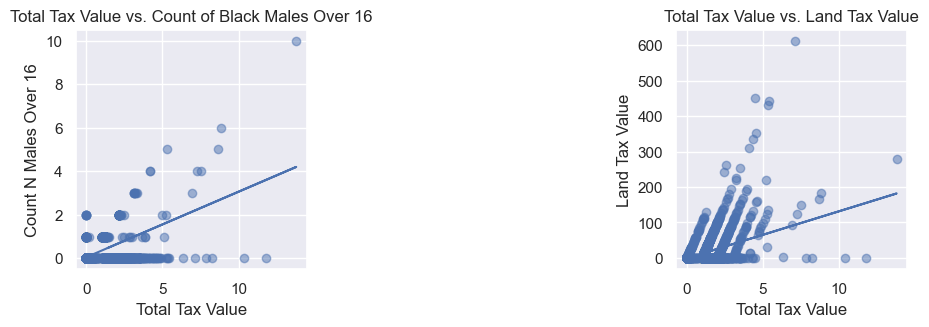

In [101]:
figure, axis = plt.subplots(1, 2)

# plot 1
x1 = np.float64(tax1867.PersonTaxTotalCountyValue)
y1 = np.float64(tax1867.PersonTaxCountNMalesover16)

m1, b1 = np.polyfit(x1, y1, 1)

axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Total Tax Value')
axis[0].set_ylabel('Count N Males Over 16')
axis[0].set_title('Total Tax Value vs. Count of Black Males Over 16')
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(tax1867.PersonTaxTotalCountyValue)
y2 = np.float64(tax1867.PersonTaxLeviedLand)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Total Tax Value')
axis[1].set_ylabel('Land Tax Value')
axis[1].set_title('Total Tax Value vs. Land Tax Value')
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

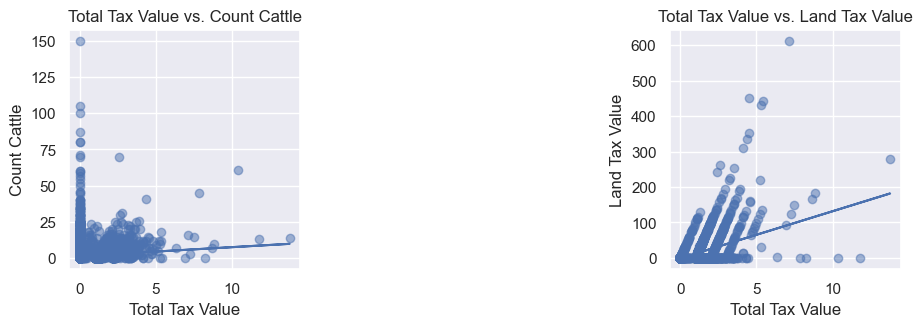

In [102]:
figure, axis = plt.subplots(1, 2)

# plot 1
x1 = np.float64(tax1867.PersonTaxTotalCountyValue)
y1 = np.float64(tax1867.PersonTaxCountCattle)

m1, b1 = np.polyfit(x1, y1, 1)

axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Total Tax Value')
axis[0].set_ylabel('Count Cattle')
axis[0].set_title('Total Tax Value vs. Count Cattle')
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(tax1867.PersonTaxTotalCountyValue)
y2 = np.float64(tax1867.PersonTaxLeviedLand)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Total Tax Value')
axis[1].set_ylabel('Land Tax Value')
axis[1].set_title('Total Tax Value vs. Land Tax Value')
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

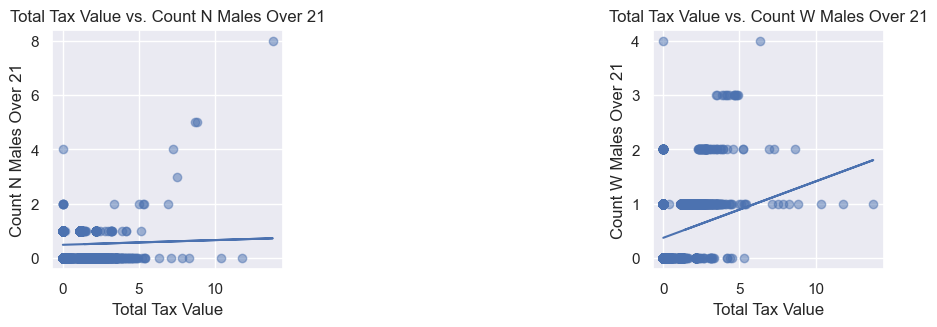

In [103]:
figure, axis = plt.subplots(1, 2)

# plot 1
x1 = np.float64(tax1867.PersonTaxTotalCountyValue)
y1 = np.float64(tax1867.PersonsTaxedCountNMalesover21)

m1, b1 = np.polyfit(x1, y1, 1)


axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Total Tax Value')
axis[0].set_ylabel('Count N Males Over 21')
axis[0].set_title('Total Tax Value vs. Count N Males Over 21')
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(tax1867.PersonTaxTotalCountyValue)
y2 = np.float64(tax1867.PersonsTaxedCountWMalesover21)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Total Tax Value')
axis[1].set_ylabel('Count W Males Over 21')
axis[1].set_title('Total Tax Value vs. Count W Males Over 21')
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

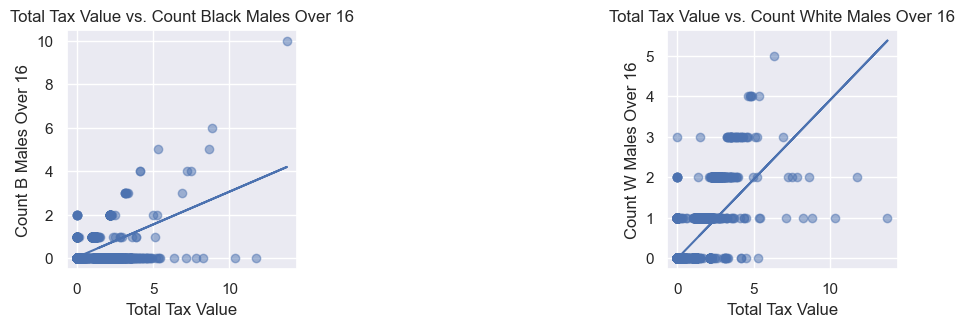

In [104]:
figure, axis = plt.subplots(1, 2)

# plot 1
x1 = np.float64(tax1867.PersonTaxTotalCountyValue)
y1 = np.float64(tax1867.PersonTaxCountNMalesover16)

m1, b1 = np.polyfit(x1, y1, 1)

axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Total Tax Value')
axis[0].set_ylabel('Count B Males Over 16')
axis[0].set_title('Total Tax Value vs. Count Black Males Over 16')
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(tax1867.PersonTaxTotalCountyValue)
y2 = np.float64(tax1867.PersonTaxCountWMalesover16)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Total Tax Value')
axis[1].set_ylabel('Count W Males Over 16')
axis[1].set_title('Total Tax Value vs. Count White Males Over 16')
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

**Explore:** Subset of tax records for people who share the same last name with their employers, indicating recently freed slaves.

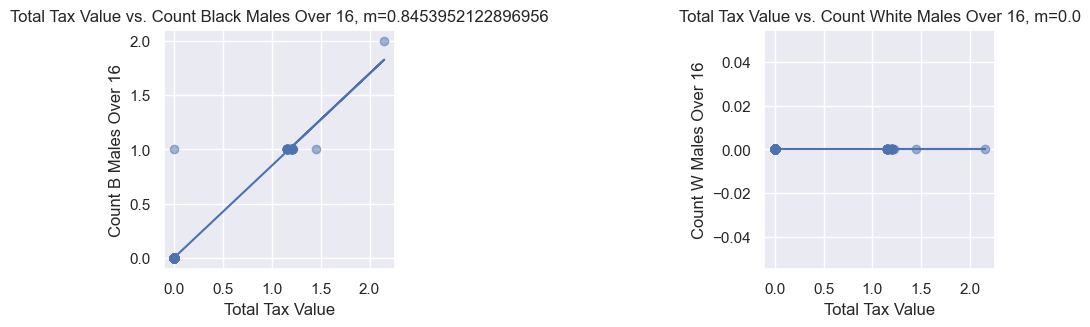

In [105]:
figure, axis = plt.subplots(1, 2)

subset = tax1867.loc[(tax1867['PersonSurname'] == tax1867['PersonRoleLocSurnameEmployer'])]

# plot 1
x1 = np.float64(subset.PersonTaxTotalCountyValue)
y1 = np.float64(subset.PersonTaxCountNMalesover16)

m1, b1 = np.polyfit(x1, y1, 1)

axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Total Tax Value')
axis[0].set_ylabel('Count B Males Over 16')
axis[0].set_title('Total Tax Value vs. Count Black Males Over 16, m=' + str(m1))
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(subset.PersonTaxTotalCountyValue)
y2 = np.float64(subset.PersonTaxCountWMalesover16)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Total Tax Value')
axis[1].set_ylabel('Count W Males Over 16')
axis[1].set_title('Total Tax Value vs. Count White Males Over 16, m=' + str(m2))
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

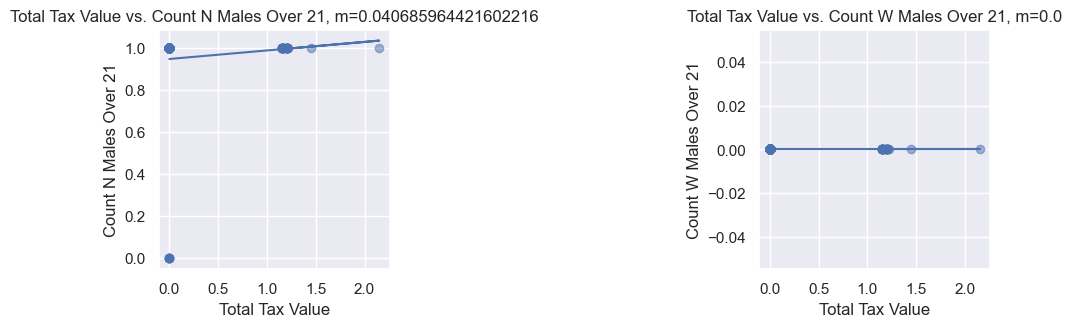

In [106]:
figure, axis = plt.subplots(1, 2)

subset = tax1867.loc[(tax1867['PersonSurname'] == tax1867['PersonRoleLocSurnameEmployer'])]

# plot 1
x1 = np.float64(subset.PersonTaxTotalCountyValue)
y1 = np.float64(subset.PersonsTaxedCountNMalesover21)

m1, b1 = np.polyfit(x1, y1, 1)


axis[0].scatter(x1, y1, alpha=0.5)
axis[0].set_xlabel('Total Tax Value')
axis[0].set_ylabel('Count N Males Over 21')
axis[0].set_title('Total Tax Value vs. Count N Males Over 21, m=' + str(m1))
axis[0].plot(x1, m1*x1+b1)

# plot 2
x2 = np.float64(subset.PersonTaxTotalCountyValue)
y2 = np.float64(subset.PersonsTaxedCountWMalesover21)

m2, b2 = np.polyfit(x2, y2, 1)

axis[1].scatter(x2, y2, alpha=0.5)
axis[1].set_xlabel('Total Tax Value')
axis[1].set_ylabel('Count W Males Over 21')
axis[1].set_title('Total Tax Value vs. Count W Males Over 21, m=' + str(m2))
axis[1].plot(x2, m2*x2+b2)

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=0.5,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

We see stronger correlation between total tax value and black males here! But note - the total tax value is in a smaller range than in the full dataset, indicating that these employers are not the richest people around (if I'm understanding the data correctly). Or maybe that tax total county value indicates how valuable the taxable person is?

C:\Users\Rachel\AppData\Local\Temp\ipykernel_24228\446349985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_employers['PersonTaxTotalCountyValue'] = np.float64(subset_employers['PersonTaxTotalCountyValue'])


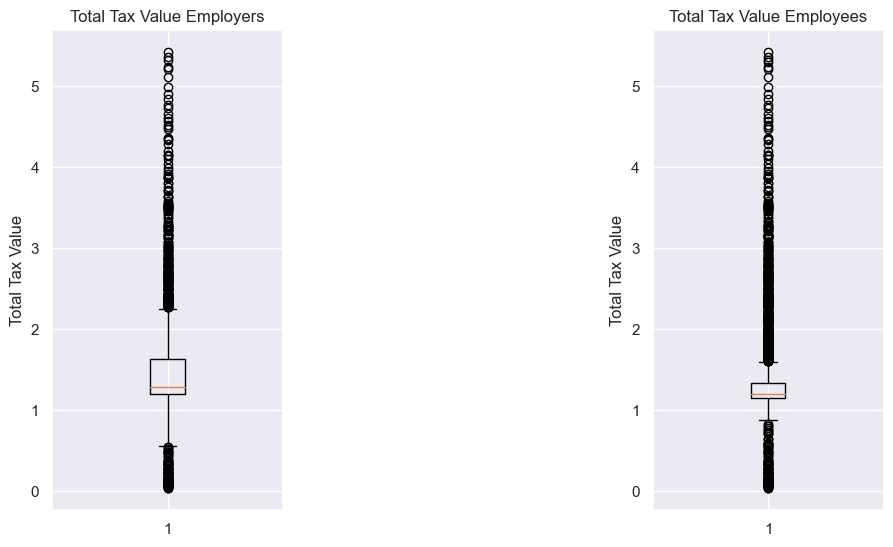

In [107]:
figure, axis = plt.subplots(1, 2)

subset_employers = tax1867.loc[(tax1867['PersonRoleLocSurnameEmployer'] == '0') | (tax1867['PersonRoleLocSurnameEmployer'] == ' ')]
subset_employers['PersonTaxTotalCountyValue'] = np.float64(subset_employers['PersonTaxTotalCountyValue'])

# plot 1
x1 = np.float64(subset_employers.loc[(subset_employers['PersonTaxTotalCountyValue'] != 0) & (subset_employers['PersonTaxTotalCountyValue'] < 6)]['PersonTaxTotalCountyValue'])

axis[0].boxplot(x1)
axis[0].set_ylabel('Total Tax Value')
axis[0].set_title('Total Tax Value Employers')

subset_employees = tax1867.loc[(tax1867['PersonRoleLocSurnameEmployer'] != '0') | (tax1867['PersonRoleLocSurnameEmployer'] != ' ')]
subset_employees['PersonTaxTotalCountyValue'] = np.float64(subset_employees['PersonTaxTotalCountyValue'])

# plot 2
x2 = np.float64(subset_employees.loc[(subset_employees['PersonTaxTotalCountyValue'] != 0) & (subset_employees['PersonTaxTotalCountyValue'] < 6)]['PersonTaxTotalCountyValue'])

axis[1].boxplot(x2)
axis[1].set_ylabel('Total Tax Value')
axis[1].set_title('Total Tax Value Employees')

# set the spacing between subplots
plt.subplots_adjust(left=0.001,
                    bottom=0.001,
                    right=1.3,
                    top=1.0,
                    wspace=1.6,
                    hspace=1.6)

plt.show()

This splits individuals into those who have an employer listed (known employees) and those who do not (assumed employers or upper-class individuals). I also removed all outliers above 6 for ease of visualization, as the values were essentially identical for both distributions. We see that the range is larger for employers, spanning from roughly 0.6 to 2.2, while for employees the range is from roughly 0.9 to 1.6. The mean for the employers is slightly higher than for the employees. Generally, we can't make any exciting conclusions from this.

### Correlation

In [108]:
# select numeric columns except year (all year values are the same)
tax1867_numeric = tax1867[['PersonTaxCountCarriageWagon', 'PersonTaxCountCattle', 'PersonTaxCountClocks', 'PersonTaxCountHogs',
                           'PersonTaxCountHorsesMules', 'PersonTaxCountMusicalInstruments', 'PersonTaxCountNMalesover16',
                           'PersonTaxCountSheep', 'PersonTaxCountWMalesover16', 'PersonTaxCountWatches', 'PersonTaxLeviedLand',
                           'PersonTaxStateAll', 'PersonTaxTotalCountyValue', 'PersonTaxValueAggregatePersonlProperty',
                           'PersonTaxValueCarriageWagon', 'PersonTaxValueCattle', 'PersonTaxValueClocks', 'PersonTaxValueFurnishings',
                           'PersonTaxValueHogs', 'PersonTaxValueHorsesMules', 'PersonTaxValueJewelry', 'PersonTaxValueMoniesSchC1',
                           'PersonTaxValueMusicalInstruments', 'PersonTaxValueSheep', 'PersonTaxValueWatches', 'PersonsTaxedCountNMalesover21',
                           'PersonsTaxedCountWMalesover21']]



# convert columns to np.float types
tax1867_numeric = tax1867_numeric.astype(np.float64)

# show dataframe
tax1867_numeric.head()

,PersonTaxCountCarriageWagon,PersonTaxCountCattle,PersonTaxCountClocks,PersonTaxCountHogs,PersonTaxCountHorsesMules,PersonTaxCountMusicalInstruments,PersonTaxCountNMalesover16,PersonTaxCountSheep,PersonTaxCountWMalesover16,PersonTaxCountWatches,...,PersonTaxValueFurnishings,PersonTaxValueHogs,PersonTaxValueHorsesMules,PersonTaxValueJewelry,PersonTaxValueMoniesSchC1,PersonTaxValueMusicalInstruments,PersonTaxValueSheep,PersonTaxValueWatches,PersonsTaxedCountNMalesover21,PersonsTaxedCountWMalesover21
0,0.0,3.0,0.0,8.0,3.0,0.0,0.0,0.0,1.0,0.0,...,100.0,34.0,135.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,...,100.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,0.0,1.0
2,0.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,3.0,0.0,...,50.0,20.0,100.0,12.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,9.0,0.0,6.0,4.0,0.0,0.0,14.0,0.0,0.0,...,50.0,30.0,225.0,20.0,0.0,0.0,20.0,0.0,0.0,0.0
4,1.0,10.0,0.0,17.0,5.0,0.0,0.0,16.0,1.0,1.0,...,150.0,50.0,400.0,5.0,0.0,0.0,40.0,20.0,0.0,1.0


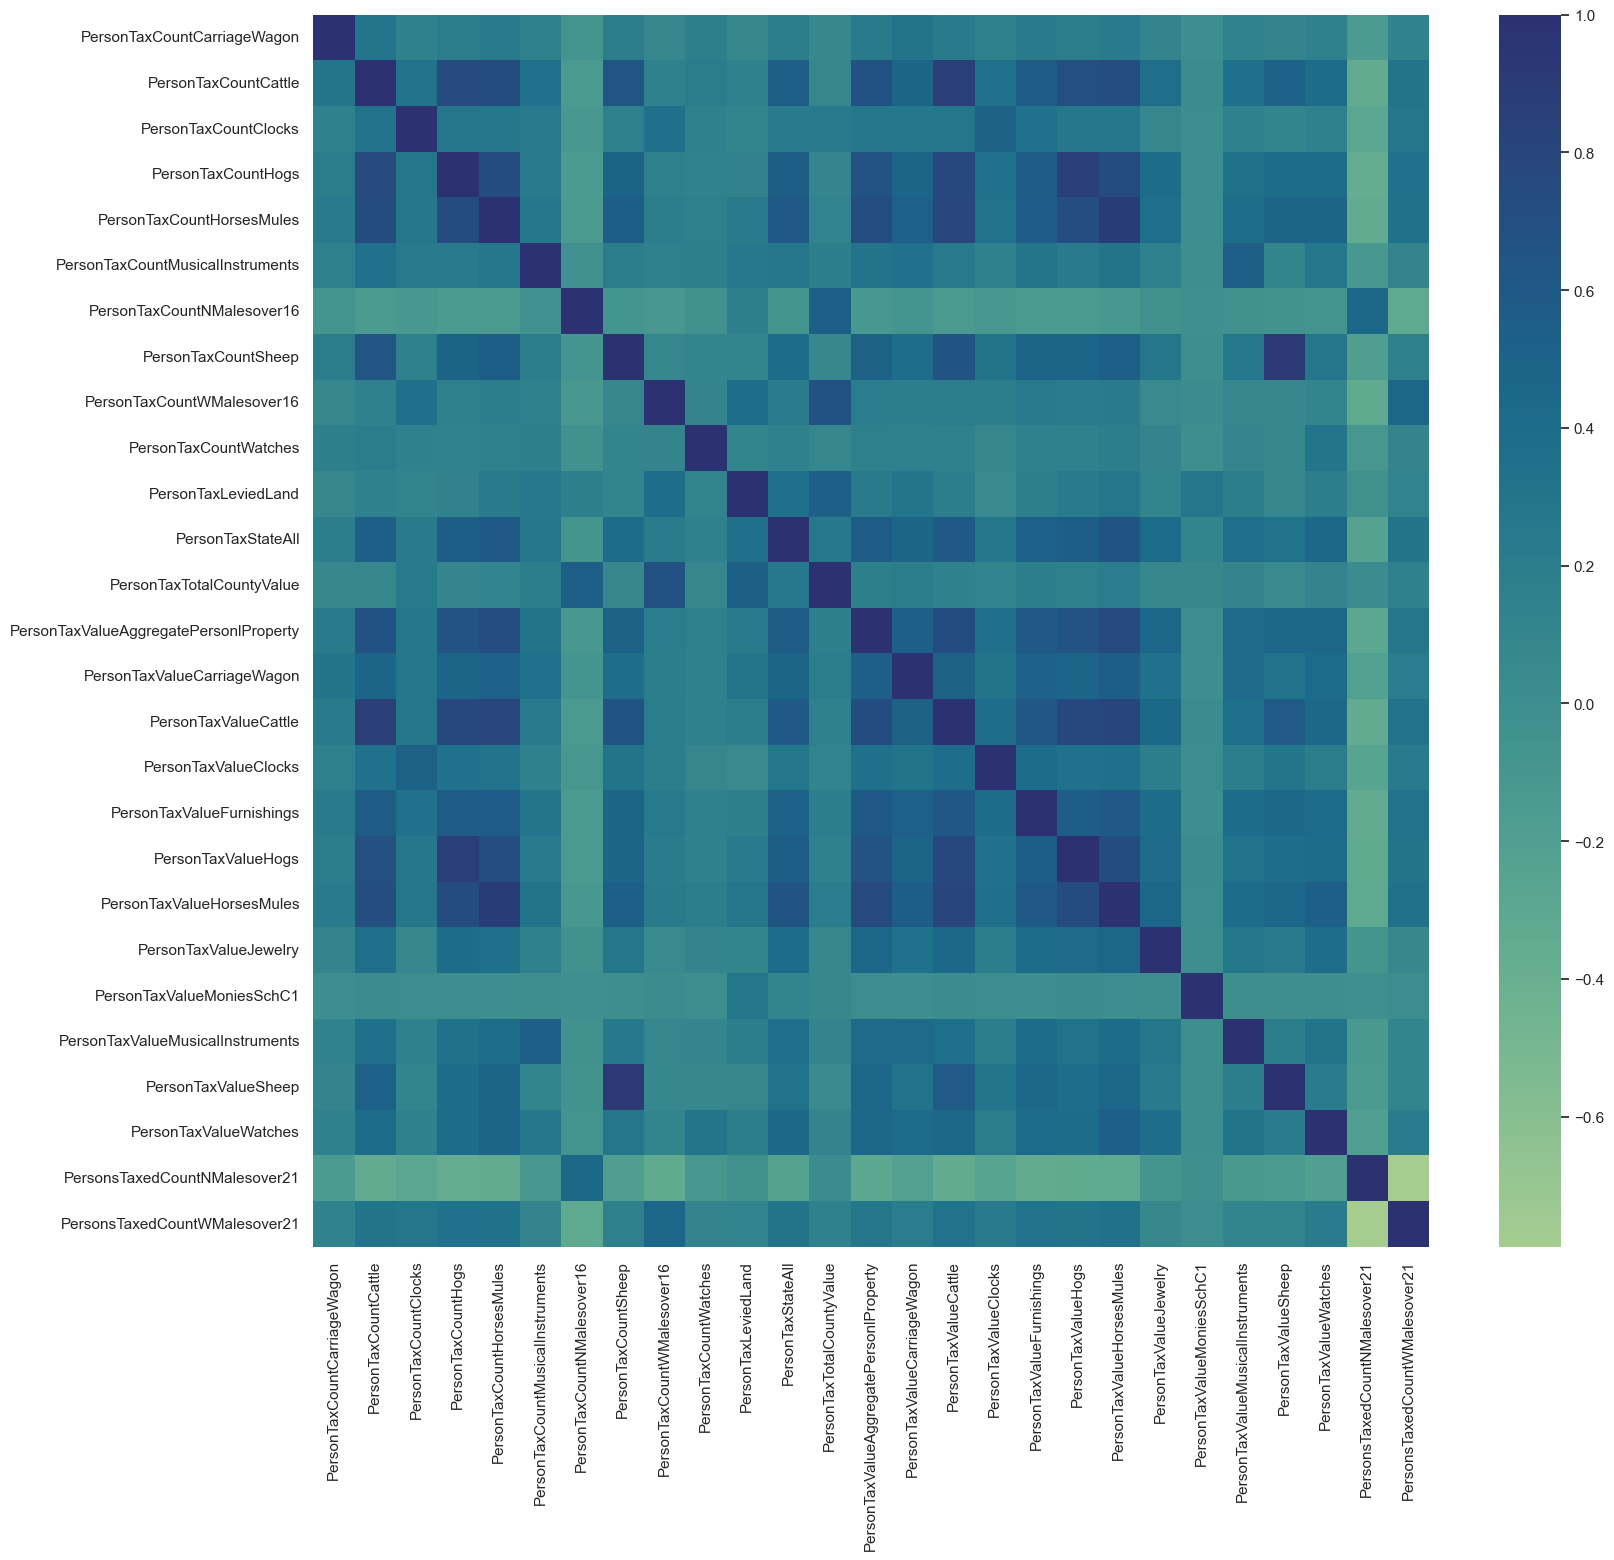

In [109]:
corr = tax1867_numeric.corr(method='pearson')

plt.figure(figsize=(18,16))

ax = sns.heatmap(corr,
        cmap="crest",
        #annot=True, # this addition makes it too messy
        xticklabels=corr.columns,
        yticklabels=corr.columns);

plt.show()

We see stronger positive correlations between most cattle, sheep, horse, and hog markers - features relating to count and to value tend to correlate strongly. Personal property, carriages/wagons, and cattle value and counts tend to correlate strongly as well.

The 'persons taxed' features - notably `PersonsTaxedCountNMalesover21`, `PersonsTaxedCountWMalesover21`, `PersonTaxCountWMalesover16`, and `PersonTaxCountNMalesover16` - tend to correlate in interesting ways.
- `PersonsTaxedCountNMalesover21` correlates moderately strongly with `PersonTaxCountNMalesover16`, but not with any other features, and actually has a very weak correlation with `PersonsTaxedCountNMalesover21`.
- `PersonTaxCountNMalesover16` also correlates with `PersonTaxTotalCountyValue`.
- On the other hand, `PersonsTaxedCountWMalesover21` correlates strongly with `PersonTaxCountWMalesover16` but also with many other markers relating to cattle, hogs, horses and mules, as well as features indicating the value of things like furnishings.
- `PersonTaxCountWMalesover16` is most correlated with `PersonsTaxedCountWMalesover21` and `PersonTaxTotalCountyValue`.